## matplotlib 可视化练习

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
mpl.rc('figure',figsize=(12,9))
mpl.rc('font',size=15)
mpl.rc('axes.spines',top=False, right=False)
#coding:utf-8

## 练习1：航班乘客变化分析
* 分析年度乘客总量变化情况（折线图）
* 分析乘客在一年中各月份的分布（柱状图）

In [3]:
data = sns.load_dataset('flights')
data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


#### 分析年度乘客总量变化情况（折线图）

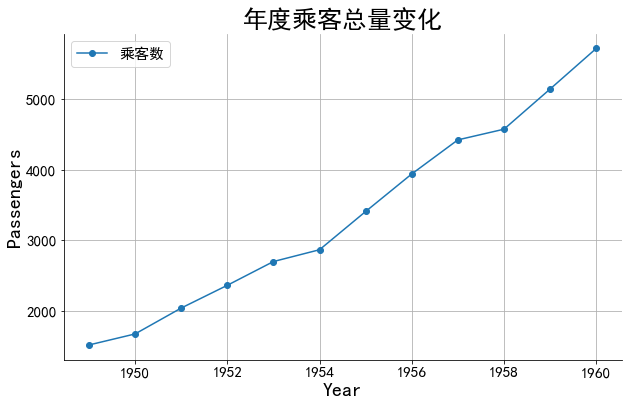

In [8]:
per_year_sum = data.groupby('year').sum()
_,axe = plt.subplots()
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(per_year_sum.index, per_year_sum['passengers'].values, marker='o', label=u'乘客数')
plt.grid(True)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Passengers', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(u'年度乘客总量变化', fontsize=25)
axe.spines['top'].set_color(None)
axe.spines['right'].set_color(None)
plt.legend(loc='best')
plt.rcParams['font.sans-serif'] = ['SimHei']

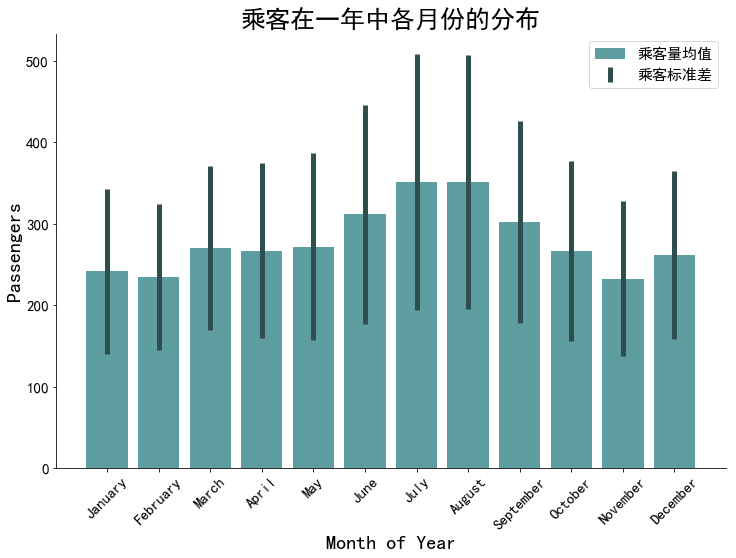

In [13]:
per_month_distribute = data.groupby('month').agg([np.mean, np.std])['passengers']
_,axe = plt.subplots()
plt.rcParams['figure.figsize'] = (12,8)
plt.bar(range(12), per_month_distribute['mean'], color='cadetblue', label='average')
plt.errorbar(range(12), per_month_distribute['mean'], yerr=per_month_distribute['std'], ls='none', color='darkslategray', lw=5, label='error')
plt.xticks(range(12), per_month_distribute.index, fontsize=15, rotation=45)
plt.xlabel('Month of Year', fontsize=20)
plt.ylabel('Passengers', fontsize=20)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.legend([u"乘客量均值", u"乘客标准差"], fontsize=15)
plt.title(u'乘客在一年中各月份的分布', fontsize=25)
axe.spines['top'].set_color(None)
axe.spines['right'].set_color(None)

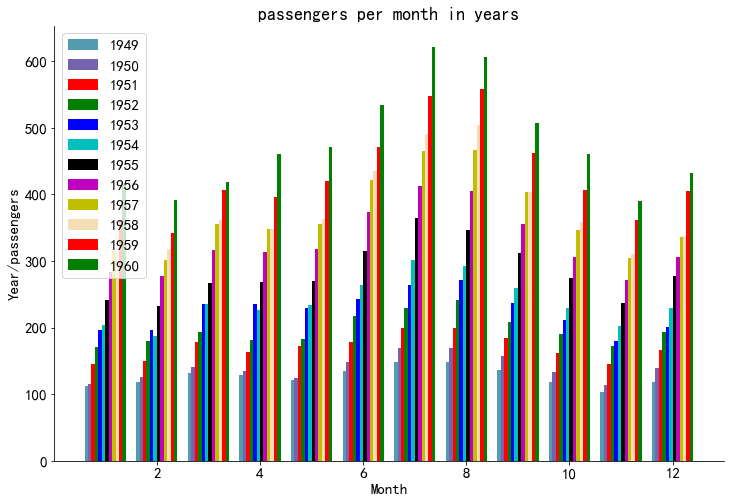

In [16]:
#绘制分组柱状图的函数
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    #设置每一组柱状图的宽度
    total_width = 0.8
    #设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    #计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2 + ind_width/2, total_width/2+ind_width/2, ind_width)
    
    #分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        #横向散开绘制
        ax.bar(x_data+alteration[i], y_data_list[i], color=colors[i], label = y_data_names[i], width = ind_width)
        
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc='best')
    
group_by_month_year = data.groupby(['year', 'month']).agg({"passengers":"sum"}).reset_index()
year_values = data.groupby('year').mean().index.values
month_values = data.groupby('month').mean().index.values

y_data = []
for t_year in year_values:
    y_data.append(group_by_month_year[group_by_month_year['year'].isin([t_year])]['passengers'])
    
#调用函数
groupedbarplot(x_data = [1,2,3,4,5,6,7,8,9,10,11,12],
              y_data_list = y_data,
              y_data_names = year_values,
              colors = ['#539caf', '#7663b0','r','g','b','c','k','m','y','wheat','r','g','c'],
              x_label = 'Month',
              y_label = 'Year/passengers',
              title = 'passengers per month in years')

## 练习2：鸢尾花花型尺寸分析
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

In [17]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


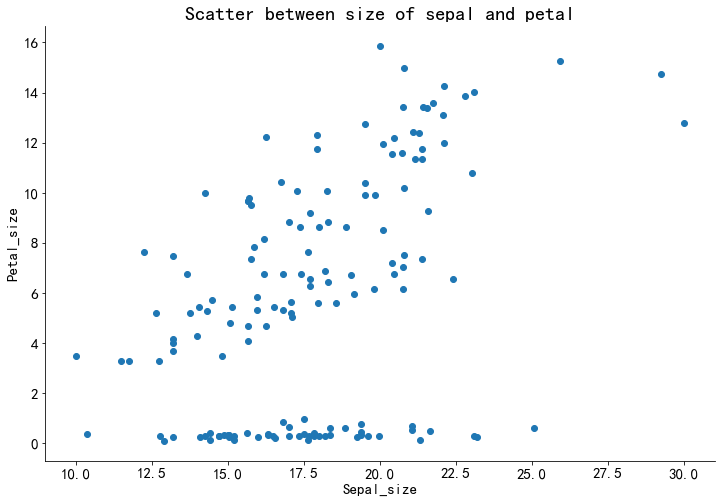

In [19]:
data['sepal_size'] = data['sepal_length'] * data['sepal_width']
data['petal_size'] = data['petal_length'] * data['petal_width']
data.head()

_,axe = plt.subplots()
plt.scatter(data['sepal_size'].values, data['petal_size'].values)
plt.xlabel('Sepal_size', fontsize=15)
plt.ylabel('Petal_size', fontsize=15)
plt.title('Scatter between size of sepal and petal', fontsize=20)
axe.spines['top'].set_color(None)
axe.spines['right'].set_color(None)

In [21]:
data['species'].value_counts().index

Index(['virginica', 'versicolor', 'setosa'], dtype='object')

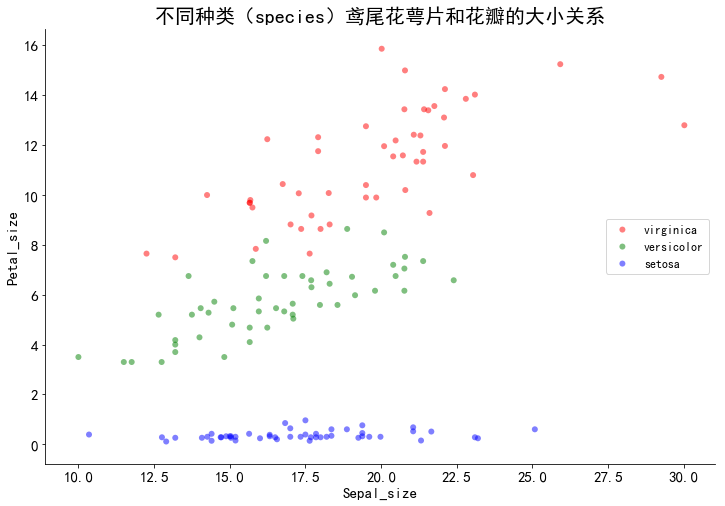

In [23]:
fig,ax = plt.subplots()
colors = ['r','g','b']
species = data['species'].value_counts().index
data1 = data.set_index(['species'])
for i,s in enumerate(species):
    ax.scatter(data1['sepal_size'].loc[s], data1['petal_size'].loc[s], c=colors[i],label=s,
              alpha=0.5, edgecolors='none')
    
ax.legend(loc=5,fontsize=12)
plt.xlabel('Sepal_size', fontsize=15)
plt.ylabel('Petal_size', fontsize=15)
plt.title(u'不同种类（species）鸢尾花萼片和花瓣的大小关系', fontsize=20)
axe.spines['top'].set_color(None)
axe.spines['right'].set_color(None)

 Text(0,0,'virginica'),
 Text(0,0,'versicolor'),
 Text(0,0,'setosa'),
 Text(0,0,'virginica'),
 Text(0,0,'versicolor'),
 Text(0,0,'setosa')]

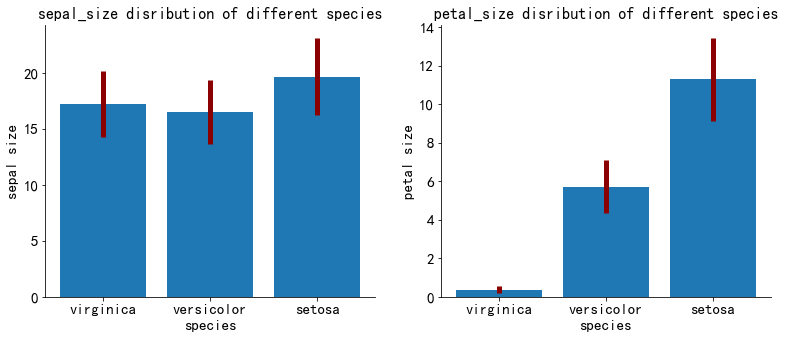

In [29]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

species = data['species'].value_counts().index
sepals = [data1['sepal_size'].loc[s] for s in species]
distribute = data.groupby('species').agg([np.mean, np.std])
for i,s in enumerate(['sepal_size','petal_size']):
    axes[i].bar(range(3),distribute[s]['mean'])
    axes[i].errorbar(range(3),distribute[s]['mean'],distribute[s]['std'],ls='none',lw=5,color='darkred')
    axes[i].set_ylabel(s.replace('_',' '), fontsize=15)
    axes[i].set_xlabel('species', fontsize=15)
    axes[i].spines['top'].set_color(None)
    axes[i].spines['right'].set_color(None)
    axes[i].set_title(u'{} disribution of different species'.format(s.replace(' ',' ')),fontsize=16)
plt.setp(axes, xticks=range(3), xticklabels=species)

In [ ]:
_,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sepals = [data1['sepal_size'].loc[s] for s in species]
petals = [data1['petal_size'].loc[s] for s in species]
